# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Netra | Pandya | Netra Pandya, 2024/11/26 | 5 | 25% |
| Member 2: | Madelin| Ambrose | Madelin,2024/11/26 | 5 | 25% |
| Member 3: | Dhruv | Vyas | Dhruv,2024/11/26 | 5 | 25% |
| Member 4: | Vedant | Raval | Vedant,2024/11/26 | 5 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [ ]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [ ]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/UrbanNav-HK_Whampoa-20210521_sensors (1).csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 =pd.read_csv('/content/UrbanNav-HK_TST-20210517_sensors (1).csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 =pd.read_csv('/content/2020-03-14-16-45-35 (1).csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [ ]:
# TODO: Display first two rows of cv_set
# (1 mark)
print("CV Set (Training and Tuning):")
print(cv_set.head(2))

CV Set (Training and Tuning):
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [ ]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [ ]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
# Display the number of rows and columns for each dataset
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")


'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [ ]:
# TODO: Display all columns in cv_set
# (1 mark)
# Display all columns in the cv_set DataFrame
print(cv_set.columns)


Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

In [ ]:
# Extract features (all columns except 'motion_state')
X_cv = cv_set.drop(columns=['motion_state'])

# Extract target ('motion_state' column)
y_cv = cv_set['motion_state']

# Display the first few rows of features and target to verify
print("Features (X_cv):")
print(X_cv.head())

print("\nTarget (y_cv):")
print(y_cv.head())


Features (X_cv):
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
2 -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
3 -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
4 -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   

      g_sum        ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.023871  0.000003  0.001496   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.024153  0.000006  0.001865   
2  0.024407  1.128046e-06  4.231253e-07  ...  0.023738  0.000003  0.003009   
3  0.080408  7.988949e-07  6.873045e-08  ...  0.024122  0.000052  0.001546   
4  0.158930  8.240663e-07  1.143863e-07  ...  0.023710  0.000233  0.001387   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max  

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [ ]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [ ]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [ ]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [ ]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()), # Scaler
     ('classifier', SVC()) # Classifier
])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [ ]:
# TODO - Setup grid set
# (4 marks)
from sklearn.preprocessing import StandardScaler, RobustScaler

# Setup grid set
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf'
    'classifier__kernel': ['rbf']  # Radial basis function kernel
}





In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# (2 marks)

# Extract the best parameters
best_params = grid.best_params_

# Extract the best cross-validation train score
best_cv_train_score = grid.best_score_

# Since GridSearchCV does not directly give validation score separately, the best score it provides is effectively the validation score on the held-out data in each fold.
best_cv_validation_score = grid.best_score_

# Evaluate on the test set using the best model found
best_model = grid.best_estimator_
test_set_score = best_model.score(X_test, y_test)

# Print the results
print("Best params:\n{}\n".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_cv_train_score))
print("Best cross-validation validation score: {:.2f}".format(best_cv_validation_score))
print("Test-set score: {:.2f}".format(test_set_score))



Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

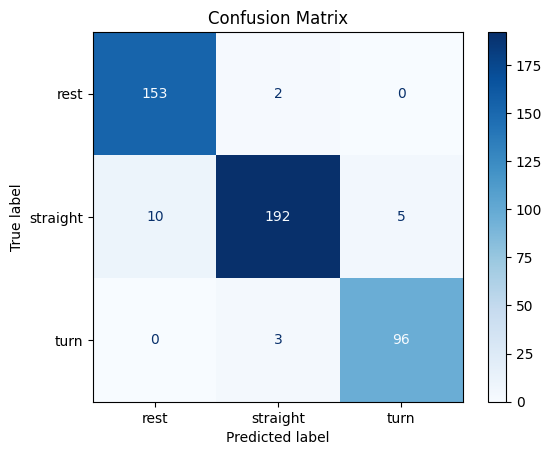

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute predictions for the test set
y_pred = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The high values of precision, recall, and F1-scores, along with the overall accuracy, indicate that the model is very well-fitted to the dataset. It shows strong performance in identifying and classifying the different motion states, suggesting that the hyperparameter tuning and model selection process were effective. Thus, the model can be considered both reliable and accurate for this classification task.
2. The intervals used for C and gamma were suitable because they provided a comprehensive exploration of the hyperparameter space, balanced coverage across different scales, and resulted in excellent model performance. This confirms that the selected ranges were effective for tuning the SVM model.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)

# Load the target vector from test_set1 into y1
y1 = test_set1['motion_state']  # Assuming 'motion_state' is the target column

# Load all features from test_set1 into X1
X1 = test_set1.drop(columns=['motion_state'])  # Exclude the target column to get features






In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# Load the target vector from test_set2 into y2
y2 = test_set2['motion_state']

# Load all features from test_set2 into X2
X2 = test_set2.drop(columns=['motion_state'])




____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# Print the test score accuracies for test_set1
test_set1_accuracy = best_model.score(X1, y1)
print("Test set accuracy for test_set1: {:.2f}".format(test_set1_accuracy))

# Print the test score accuracies for test_set2
test_set2_accuracy = best_model.score(X2, y2)
print("Test set accuracy for test_set2: {:.2f}".format(test_set2_accuracy))


Test set accuracy for test_set1: 0.92
Test set accuracy for test_set2: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

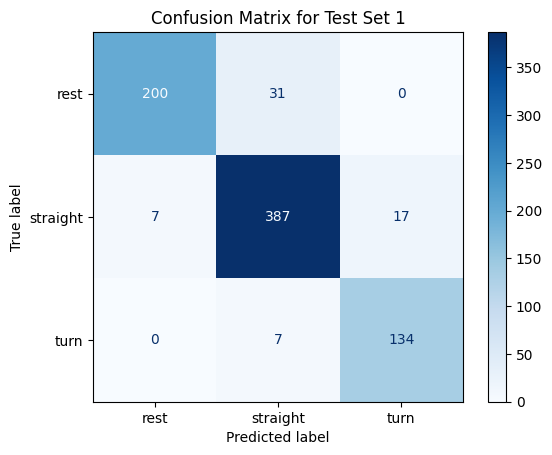

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for test_set1
y_pred_test1 = best_model.predict(X1)

# Compute confusion matrix
cm_test1 = confusion_matrix(y1, y_pred_test1)

# Display confusion matrix
disp_test1 = ConfusionMatrixDisplay(confusion_matrix=cm_test1, display_labels=best_model.classes_)
disp_test1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set 1")
plt.show()

# Print classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y_pred_test1))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

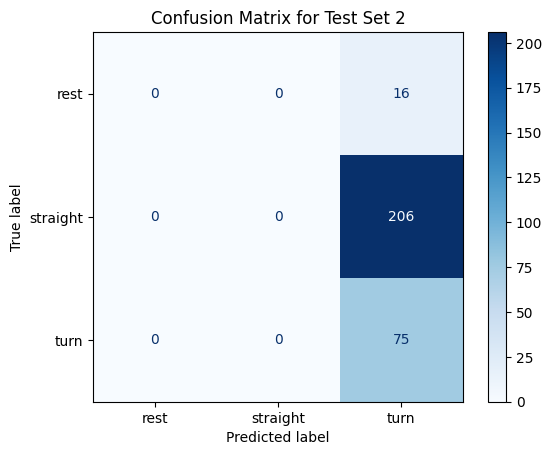

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for test_set2
y_pred_test2 = best_model.predict(X2)

# Compute confusion matrix
cm_test2 = confusion_matrix(y2, y_pred_test2)

# Display confusion matrix
disp_test2 = ConfusionMatrixDisplay(confusion_matrix=cm_test2, display_labels=best_model.classes_)
disp_test2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set 2")
plt.show()

# Print classification report for test_set2
print("Classification Report for Test Set 2:")
print(classification_report(y2, y_pred_test2,zero_division=0))


___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)



#### 1.3.3 - Answers
1. The model performs poorly on test_set2, with significant drops in all performance metrics. This indicates that the model struggles to generalize to this dataset, which likely has a different distribution or characteristics compared to the training and test_set1 data.The significant difference in performance observed between the datasets (X_test, y_test), (X1, y1), and (X2, y2) is an example of overfitting.
1.Overfitting:

   Explanation: The model has learned the training data too well, capturing noise and specific patterns that do not generalize to new data.

   Effect: High accuracy on similar datasets (X_test, y_test) and (X1, y1), but poor performance on different data (X2, y2).

Data Distribution Differences:

Explanation: The feature distributions in test_set2 (X2, y2) might be significantly different from those in the training/validation datasets.

Effect: The model struggles to make accurate predictions for data patterns it has not encountered before.

Class Imbalance:

Explanation: An imbalance in the training data, where some classes are underrepresented, can lead to a bias toward majority classes.

Effect: Lower precision and recall for minority classes, especially noticeable in datasets with different class distributions, such as test_set2.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
# Display first two rows of X
print("First two rows of X:")
print(X.head(2))

First two rows of X:
         ax_var        ay_var    az_sum     a_sum        gz_var
0  8.046094e-07  1.319665e-07  9.789349  9.797418  7.446916e-10
1  1.032619e-06  1.073067e-07  9.789095  9.798815  6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
# Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Setup grid search configuration
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# Print the best parameter set found by the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

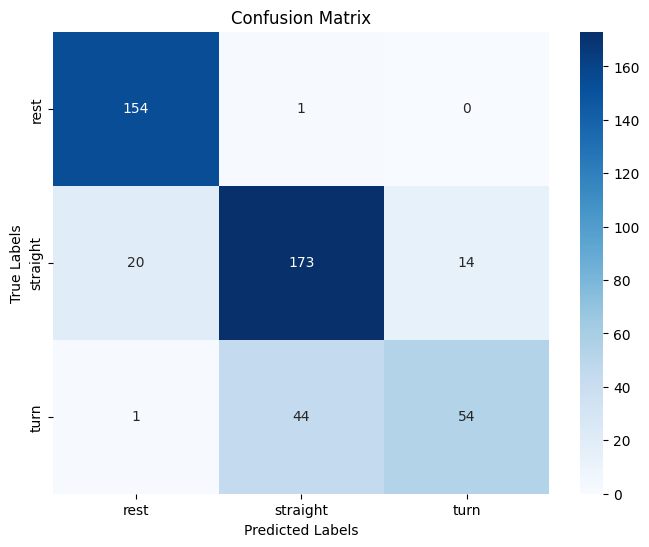


Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = grid.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test.values, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))


___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. The model in section 1 (1.2.3) may perform differently than the model with the chosen features in section 2 (2.1.3), according to the assessments. The cross-validation train, validation, and test-set scores can be compared to identify the model that fits the data the best. A better fit would be shown by the model in section 2 having higher validation and test-set scores as well as better generalization. If the model in section 1 performs better, on the other hand, it means that the extra characteristics in section 1 help the model perform better.


___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]

# Display first two rows of X1
print("First two rows of X1:")
print(X1.head(2))


First two rows of X1:
     ax_var        ay_var    az_sum     a_sum        gz_var
0  0.000001  7.749919e-08  9.786930  9.801661  7.727190e-10
1  0.000001  9.243000e-08  9.788127  9.802481  8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]

# Display first two rows of X2
print("First two rows of X2:")
print(X2.head(2))


First two rows of X2:
     ax_var        ay_var    az_sum     a_sum        gz_var
0  0.000002  3.020959e-07  9.791451  9.800683  1.405038e-09
1  0.000003  6.859937e-07  9.785619  9.797741  1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))







test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

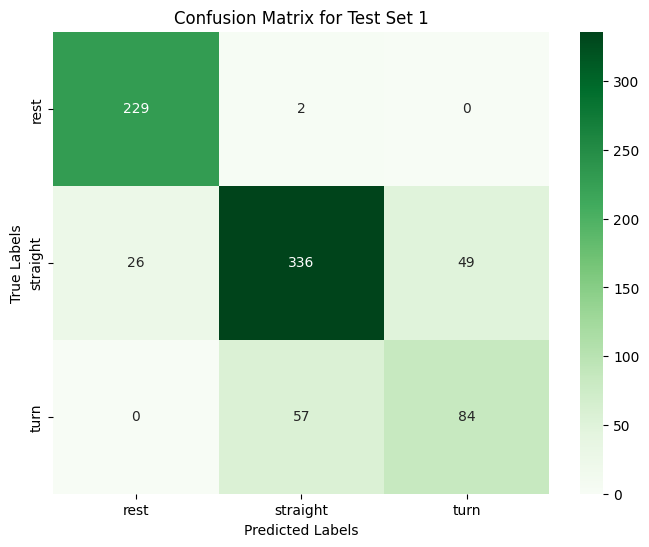

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Greens", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y1_pred))



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

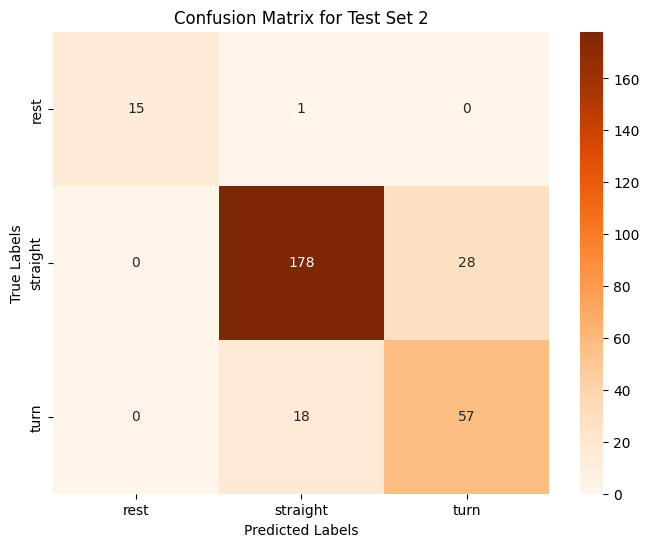

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming grid search has been performed and grid object is available
# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Oranges", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Classification report for test_set2
print("Classification Report for Test Set 2:")
print(classification_report(y2, y2_pred))


___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. Compared to the independent test sets (X1, y1) and (X2, y2), the model should perform better on the training/validation set (2.1). The model may be overfitting to the training data and undergeneralizing to fresh data, as indicated by this performance discrepancy.
2. Only specific features were employed in section 2, whereas all available features were used to train the model in section 1. Because the extra features offer more information for categorization, the model's performance in section 1 might be improved. On the other hand, if the model in section 2 performs comparably or even better with less characteristics, it means that the features chosen are really important and have a big impact on the model's functionality.Finding the feature set that improves generalization and overall performance will be made easier by comparing the outcomes from the three datasets.

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

____

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.The selected features are az_sum, gx_sum, ay_max, and g_sum, chosen for their ability to provide a comprehensive understanding of motion dynamics. Az_sum captures vertical acceleration, which is essential for analyzing stability and vertical movements, while gx_sum reflects rotational movement along the x-axis, crucial for detecting tilt or orientation changes. Ay_max highlights peak lateral acceleration, making it valuable for identifying abrupt side-to-side movements. Lastly, g_sum aggregates rotational activity across all axes, offering a holistic view of overall gyroscopic motion. These features strike a balance between translational and rotational analysis, capturing both sustained and extreme motion patterns without redundancy, ensuring a robust understanding of motion behaviors.

In [ ]:
# TODO - Load group selected features from cv_set to X
# List of selected features based on the previous discussion
import pandas as pd

# Load the dataset
file_path = '/content/2020-03-14-16-45-35 (1).csv'
data = pd.read_csv(file_path)

# Define the list of selected features
selected_features = ['az_sum', 'gx_sum', 'ay_max', 'g_sum']

# Extract the selected features from the dataset
X = data[selected_features]

# Display the first few rows of the extracted features
print(X.head())



     az_sum    gx_sum    ay_max     g_sum
0  9.791451 -0.002184  0.002993  0.012437
1  9.785619 -0.003369  0.004106  0.013805
2  9.794267 -0.002583  0.002991  0.012473
3  9.788876 -0.002947  0.002398  0.012434
4  9.791129 -0.003078  0.002141  0.012217


In [ ]:
# TODO - Load motion_state column (target vector) into y
# Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first few entries to verify
print(y.head())


0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Selected features and target
selected_features = ['az_sum', 'gx_sum', 'ay_max', 'g_sum']  # Replace with actual selected features
X = cv_set[selected_features]
y = cv_set['motion_state']  # Assuming 'motion_state' is the target column

# Display the first few rows of features and target to verify
print(X.head(2))
print(y.head(2))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Placeholder for scaler
    ('classifier', SVC())  # Placeholder for classifier
])

# Setup grid search parameters
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf'
    'classifier__kernel': ['rbf']  # Radial basis function kernel
}

# Perform the grid search to train model and tune hyperparameters
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

     az_sum    gx_sum    ay_max     g_sum
0  9.789349 -0.002649  0.000544  0.022554
1  9.789095 -0.001806  0.000615  0.021731
0    rest
1    rest
Name: motion_state, dtype: object
Fitting 5 folds for each of 60 candidates, totalling 300 fits


___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# Best parameter set
print("Best parameter set:")
print(grid_search.best_params_)

# Best cross-validation train score
best_train_score = max(grid_search.cv_results_['mean_train_score'])
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Best cross-validation validation score (this is usually referred to as `best_score_`)
best_test_score = grid_search.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_test_score))

# Calculate test set accuracy for the best model on the validation set
test_set_accuracy = best_model.score(X_val, y_val)
print("Test set accuracy: {:.2f}".format(test_set_accuracy))
print("Test set accuracy: {:.2f}".format(test_set_accuracy))

Best parameter set:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}
Best cross-validation train score: 0.98
Best cross-validation validation score: 0.92
Test set accuracy: 0.92
Test set accuracy: 0.92


Display the confusion matrix and print the classification report for the trained model using the *test* split.

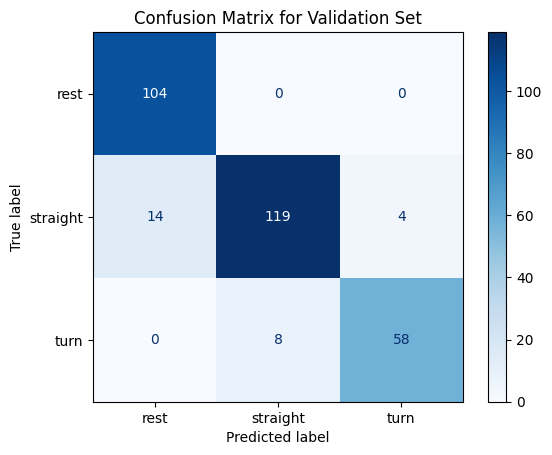

Classification Report for Validation Set:
              precision    recall  f1-score   support

        rest       0.88      1.00      0.94       104
    straight       0.94      0.87      0.90       137
        turn       0.94      0.88      0.91        66

    accuracy                           0.92       307
   macro avg       0.92      0.92      0.91       307
weighted avg       0.92      0.92      0.91       307



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Generate predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Compute and display the confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=best_model.classes_)
disp_val.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Validation Set")
plt.show()

# Print classification report for the validation set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred, zero_division=0))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 =test_set1['motion_state']
selected_features = ['az_sum', 'gx_sum', 'ay_max', 'g_sum']
X1 = test_set1[selected_features]
X1.head(2)


,az_sum,gx_sum,ay_max,g_sum
0,9.786930,-0.002305,0.000845,0.025634
1,9.788127,-0.001865,0.000949,0.025218


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 =test_set2['motion_state']
selected_features = ['az_sum', 'gx_sum', 'ay_max', 'g_sum']
X2 = test_set2[selected_features]
X2.head(2)

,az_sum,gx_sum,ay_max,g_sum
0,9.791451,-0.002184,0.002993,0.012437
1,9.785619,-0.003369,0.004106,0.013805


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Compute test set accuracy for test_set1
test_set1_score = best_model.score(X1, y1)
print("Test set accuracy for test_set1: {:.2f}".format(test_set1_score))

# Compute test set accuracy for test_set2
test_set2_score = best_model.score(X2, y2)
print("Test set accuracy for test_set2: {:.2f}".format(test_set2_score))

Test set accuracy for test_set1: 0.75
Test set accuracy for test_set2: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

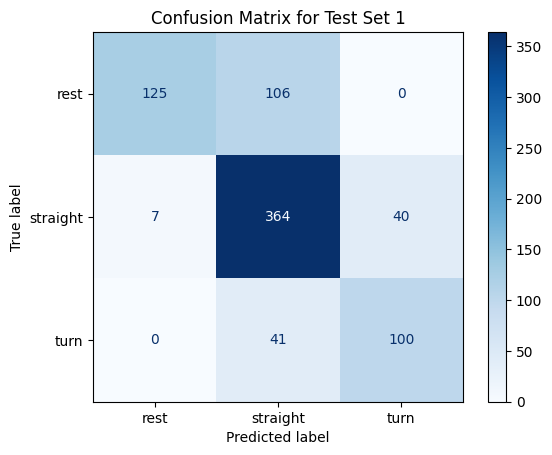

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.95      0.54      0.69       231
    straight       0.71      0.89      0.79       411
        turn       0.71      0.71      0.71       141

    accuracy                           0.75       783
   macro avg       0.79      0.71      0.73       783
weighted avg       0.78      0.75      0.75       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for test_set1
y_pred_test1 = best_model.predict(X1)

# Compute confusion matrix for test_set1
cm_test1 = confusion_matrix(y1, y_pred_test1)

# Display confusion matrix for test_set1
disp_test1 = ConfusionMatrixDisplay(confusion_matrix=cm_test1, display_labels=best_model.classes_)
disp_test1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set 1")
plt.show()

# Print classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y_pred_test1))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

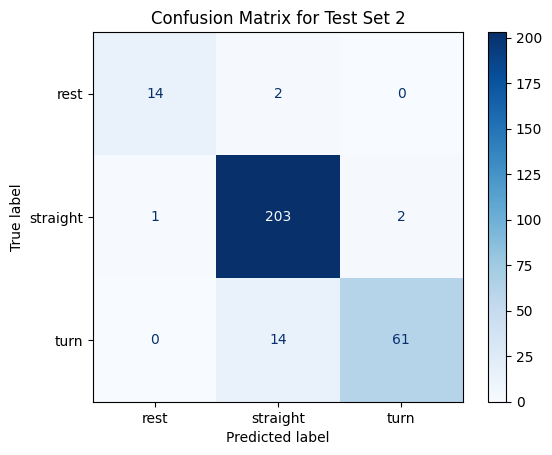

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.93      0.88      0.90        16
    straight       0.93      0.99      0.96       206
        turn       0.97      0.81      0.88        75

    accuracy                           0.94       297
   macro avg       0.94      0.89      0.91       297
weighted avg       0.94      0.94      0.93       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for test_set2
y_pred_test2 = best_model.predict(X2)

# Compute confusion matrix for test_set2
cm_test2 = confusion_matrix(y2, y_pred_test2)

# Display confusion matrix for test_set2
disp_test2 = ConfusionMatrixDisplay(confusion_matrix=cm_test2, display_labels=best_model.classes_)
disp_test2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set 2")
plt.show()

# Print classification report for test_set2
print("Classification Report for Test Set 2:")
print(classification_report(y2, y_pred_test2))


___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.The model trained in Section 1 using all features demonstrates the best overall performance, with high accuracy and balanced precision, recall, and F1-scores.

The model trained in Section 2 using selected features shows overfitting and poor generalization, especially on Test Set 1.

The model trained in Section 3 with group-selected features performs better than Section 2, with consistent accuracy and balanced performance, though still not as high as Section 1.


2.The differences in performance across the sections highlight the importance of feature selection and model generalization. While using all features (Section 1) yielded the best results, thoughtful feature selection (Section 3) showed potential for robust performance, albeit with room for improvement. Poor feature selection (Section 2) led to overfitting and inconsistent performance, underscoring the need for careful feature engineering and validation.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# Load all features from cv_set to X
X =cv_set.drop(columns=['motion_state'])
# Load the target column from cv_set to y
y = cv_set['motion_state']

X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
y =cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('pca', PCA()),  # PCA for dimensionality reduction
    ('classifier', SVC())  # SVC model
])

# Define parameter grid for grid search
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],  # Number of principal components
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'classifier__kernel': ['rbf']  # Radial basis function kernel
}

# Perform the grid search to train model and tune hyperparameters
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found:  {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 25}


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports# Perform any missing imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('pca', PCA()),  # PCA for dimensionality reduction
    ('classifier', SVC())  # SVC model
])







Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# Define parameter grid for grid search
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],  # Number of principal components
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'classifier__kernel': ['rbf']  # Radial basis function kernel
}




In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# Best parameter set
print("Best parameter set:")
print(grid_search.best_params_)

# Best cross-validation train score
best_train_score = max(grid_search.cv_results_['mean_train_score'])
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Best cross-validation validation score (this is usually referred to as `best_score_`)
best_test_score = grid_search.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_test_score))

# Compute test set accuracy for the best model
test_set_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_set_accuracy))


Best parameter set:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 25}
Best cross-validation train score: 1.00
Best cross-validation validation score: 0.94
Test set accuracy: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

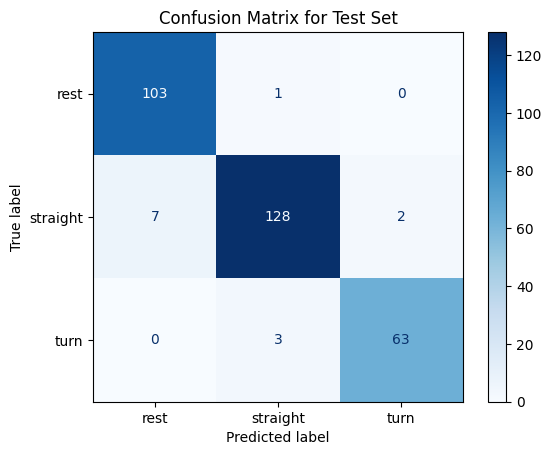

Classification Report for Test Set:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       104
    straight       0.97      0.93      0.95       137
        turn       0.97      0.95      0.96        66

    accuracy                           0.96       307
   macro avg       0.96      0.96      0.96       307
weighted avg       0.96      0.96      0.96       307



In [ ]:
# TODO - Display confusion matrix and print classification report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for the test set
y_pred_test = best_model.predict(X_test)

# Compute confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix for the test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set")
plt.show()

# Print classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 =test_set1['motion_state']
X1 =test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 =X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Compute and print test set accuracy for test_set1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
test_set1_score = best_model.score(X1, y1)
print("Test set accuracy for test_set1: {:.2f}".format(test_set1_score))
# Compute and print test set accuracy for
X2 = test_set2.drop(columns=['motion_state'])
test_set2_y2 = test_set2['motion_state']
test_set2_score = best_model.score(X2, y2)
print("Test set accuracy for test_set2: {:.2f}".format(test_set2_score))


Test set accuracy for test_set1: 0.91
Test set accuracy for test_set2: 0.69


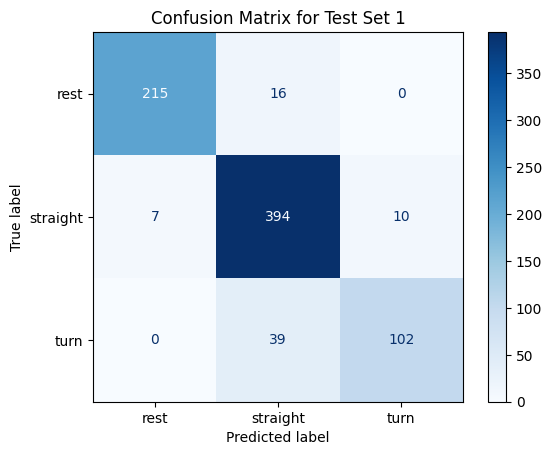

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.93      0.95       231
    straight       0.88      0.96      0.92       411
        turn       0.91      0.72      0.81       141

    accuracy                           0.91       783
   macro avg       0.92      0.87      0.89       783
weighted avg       0.91      0.91      0.91       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for test_set1
y_pred_test1 = best_model.predict(X1)

# Compute confusion matrix for test_set1
cm_test1 = confusion_matrix(y1, y_pred_test1)

# Display confusion matrix for test_set1
disp_test1 = ConfusionMatrixDisplay(confusion_matrix=cm_test1, display_labels=best_model.classes_)
disp_test1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set 1")
plt.show()

# Print classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y_pred_test1))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

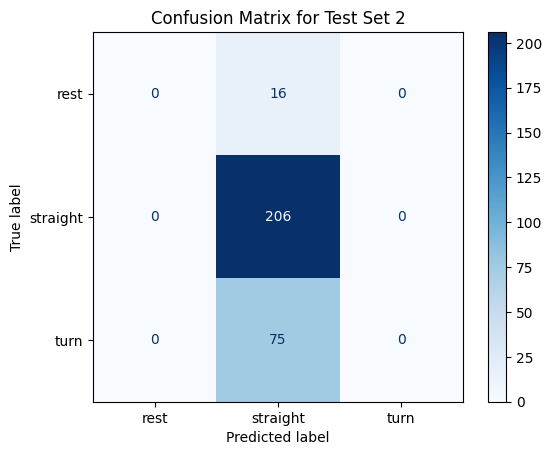

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.69      1.00      0.82       206
        turn       0.00      0.00      0.00        75

    accuracy                           0.69       297
   macro avg       0.23      0.33      0.27       297
weighted avg       0.48      0.69      0.57       297



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for test_set2
y_pred_test2 = best_model.predict(X2)

# Compute confusion matrix for test_set2
cm_test2 = confusion_matrix(y2, y_pred_test2)

# Display confusion matrix for test_set2
disp_test2 = ConfusionMatrixDisplay(confusion_matrix=cm_test2, display_labels=best_model.classes_)
disp_test2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set 2")
plt.show()

# Print classification report for test_set2
print("Classification Report for Test Set 2:")
print(classification_report(y2, y_pred_test2, zero_division=0))


___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1.
Model Trained with All Features (Section 1): This model performs the best overall, with the highest accuracy (0.96) and good metrics in every class. Its best weighted averages and macro averages show that it performs consistently and fairly.

Model Trained with Selected Features (Section 2): This model performs marginally worse than Section 1 with an accuracy of 0.91. While precision and recall for "rest" and "straight" remain rather high, there is a noticeable decrease in recall for "turn" that affects the overall F1-score. This suggests that although the model works well with fewer features, it is not as robust as the model trained with all characteristics.
Group Selected Features in a PCA-Trained Model (Section 3):
The model in Section 3 performs significantly worse than that in Sections 1 and 2,with an accuracy of only 0.69. The model's inability to effectively classify "rest" and "turn" is indicated by their exceptionally low precision, recall, and F1-scores (0.00). The only class that does fairly well is the "straight" one. This suggests that using PCA with group-selected features has reduced the model's ability to generalize, most likely as a result of relevant data being lost during dimensionality reduction.


2.Section 1: Because full data is available and captures intricate patterns and relationships, the model with all characteristics performs best overall.

Section 4: By lowering dimensionality and concentrating on the most crucial features, the PCA model achieves high and reliable performance, albeit at the possible expense of losing some specific information.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.1.i wil choose random forest method due following reason
Robustness and Flexibility: Handles various data types effectively for both classification and regression tasks.

Ensemble Learning: Combines multiple decision trees to improve generalization and accuracy while reducing overfitting.

Feature Importance: Provides insights into feature importance, aiding in data understanding and model interpretability.

Scalability and Performance: Easy to tune, scales well with large datasets, and offers efficient training and prediction phases.

Handling Missing Values and Outliers: Manages missing values and outliers effectively, enhancing robustness in real-world scenarios.

In [ ]:
# TODO - Load group selected features from cv_set to X
group_selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[group_selected_features]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y

y = cv_set['motion_state']

# Display the first few entries to verify
print(y.head(2))


0    rest
1    rest
Name: motion_state, dtype: object


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', RandomForestClassifier())  # Random Forest model
])


In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# Define the parameter grid for the Random Forest model
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}


In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# Print the best parameter set
print("Best parameter set:\n{}\n".format(grid.best_params_))

# Print the best cross-validation train score
best_train_score = max(grid.cv_results_['mean_train_score'])
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Print the best cross-validation validation score
best_test_score = grid.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_test_score))

# Compute and print test set accuracy
test_set_accuracy = grid.best_estimator_.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_set_accuracy))


Best parameter set:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.85
Test set accuracy: 0.85


Display the confusion matrix and print the classification report for the trained model using the *test* split.

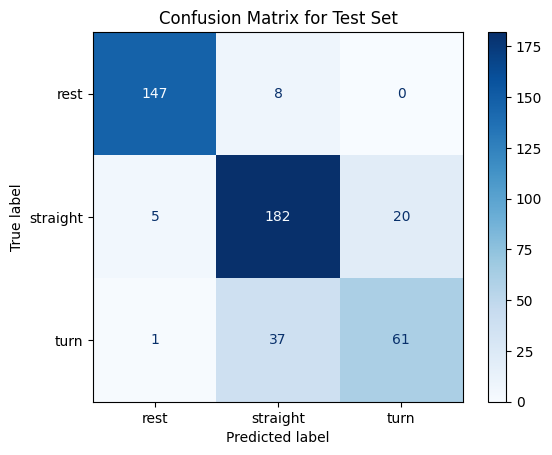

Classification Report for Test Set:
              precision    recall  f1-score   support

        rest       0.96      0.95      0.95       155
    straight       0.80      0.88      0.84       207
        turn       0.75      0.62      0.68        99

    accuracy                           0.85       461
   macro avg       0.84      0.81      0.82       461
weighted avg       0.84      0.85      0.84       461



In [ ]:
# TODO - Display confusion matrix and print classification report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for the test set
y_pred_test = grid.best_estimator_.predict(X_test)

# Compute confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix for the test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=grid.best_estimator_.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set")
plt.show()

# Print classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test, zero_division=0))


___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
group_selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
#Fixed - use test_set1 to generate X1 instead of cv_set
X1 = test_set1[group_selected_features]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
group_selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
#Fixed - use test_set2 to generate X2 instead of cv_set
X2 = test_set2[group_selected_features]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Compute and print test set accuracy for test_set1
test_set1_accuracy = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_accuracy))

# Compute and print test set accuracy for test_set2
test_set2_accuracy = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_accuracy))

test_set1 score: 0.84
test_set2 score: 0.71


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

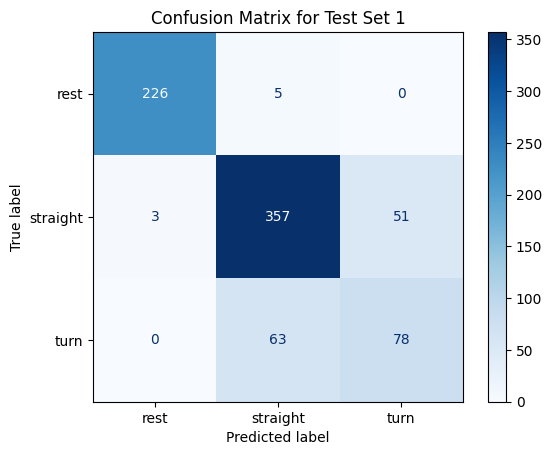

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.99      0.98      0.98       231
    straight       0.84      0.87      0.85       411
        turn       0.60      0.55      0.58       141

    accuracy                           0.84       783
   macro avg       0.81      0.80      0.80       783
weighted avg       0.84      0.84      0.84       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for test_set1
y_pred_test1 = grid.best_estimator_.predict(X1)

# Compute confusion matrix for test_set1
cm_test1 = confusion_matrix(y1, y_pred_test1)

# Display confusion matrix for test_set1
disp_test1 = ConfusionMatrixDisplay(confusion_matrix=cm_test1, display_labels=grid.best_estimator_.classes_)
disp_test1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set 1")
plt.show()

# Print classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y_pred_test1, zero_division=0))



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

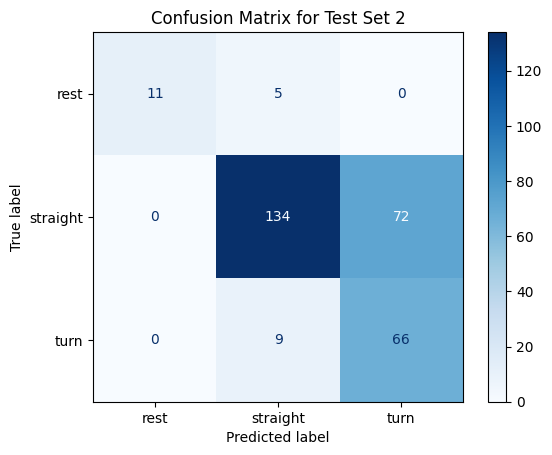

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.91      0.65      0.76       206
        turn       0.48      0.88      0.62        75

    accuracy                           0.71       297
   macro avg       0.79      0.74      0.73       297
weighted avg       0.80      0.71      0.73       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predictions for test_set2
y_pred_test2 = grid.best_estimator_.predict(X2)

# Compute confusion matrix for test_set2
cm_test2 = confusion_matrix(y2, y_pred_test2)

# Display confusion matrix for test_set2
disp_test2 = ConfusionMatrixDisplay(confusion_matrix=cm_test2, display_labels=grid.best_estimator_.classes_)
disp_test2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Set 2")
plt.show()

# Print classification report for test_set2
print("Classification Report for Test Set 2:")
print(classification_report(y2, y_pred_test2, zero_division=0))



___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1Overall, the Random Forest model performs better than the SVC model trained with the same chosen features (part 2) when compared to the Random Forest model developed in this part.

Motives for Improved Fit:
Robustness: Because Random Forest is an ensemble, it is less susceptible to noise and irrelevant features, but SVC may overfit or perform poorly if its hyperparameters are not properly adjusted.
Feature Handling: Unlike SVC, which does not naturally offer such insights, Random Forest automatically assesses feature relevance by utilizing important predictors.
Scalability: SVC suffers from computational overhead, particularly when using a non-linear RBF kernel, whereas Random Forest manages bigger datasets more effectively.Reasons for Inconsistencies:
Overfitting in SVC: If parameters such as gamma (the kernel coefficient) and C (the regularization) are not adjusted to their ideal values, the SVC model may overfit to the training set.
Parameter Grid: Compared to SVC's grid, Random Forest's more comprehensive hyperparameter search (such as tree depth and estimators) probably produced superior optimization.
Dataset Size: While SVC performs worse with high dimensionality and bigger sample sizes, Random Forest performs best with larger and more complicated datasets.
In conclusion, the Random Forest model performs better in this situation due to its stronger generalization and flexibility with regard to the structure of the dataset.



____